In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "aaradhanajha" # username from the json file
os.environ['KAGGLE_KEY'] = "ae4077e7b0a177d6753f9d330ca6a4f7"

In [0]:
!kaggle datasets download -d tomerel/traffic-signs-pickled-dataset

 93% 110M/118M [00:01<00:00, 62.5MB/s] 
100% 118M/118M [00:01<00:00, 76.4MB/s]


In [0]:
!unzip traffic-signs-pickled-dataset.zip

Archive:  traffic-signs-pickled-dataset.zip
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p                 


In [0]:
with open("train.p",mode='rb') as training_data:
  train=pickle.load(training_data)

with open("valid.p",mode='rb') as validation_data:
  valid=pickle.load(validation_data)

with open("test.p",mode='rb') as testing_data:
  test=pickle.load(testing_data)

In [0]:
X_train , y_train = train['features'], train['labels']
X_validation , y_validation = valid['features'], valid['labels']
X_test , y_test = test['features'], test['labels']


In [12]:
X_train.shape

(34799, 32, 32, 3)

In [13]:
y_train.shape

(34799,)

In [14]:
X_validation.shape

(4410, 32, 32, 3)

In [15]:
X_test.shape

(12630, 32, 32, 3)

7

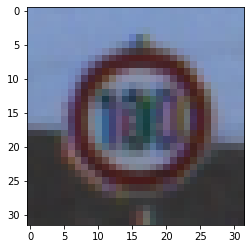

In [16]:
i = np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
y_train[i]

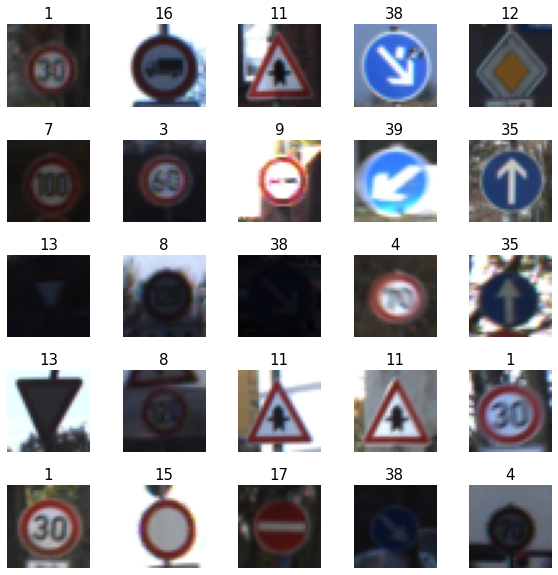

In [18]:
W_grid = 5
L_grid = 5

fig , axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0,W_grid*L_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index], fontsize = 15)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)


In [0]:
from sklearn.utils import shuffle
X_train , y_train = shuffle(X_train,y_train)

In [0]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)
X_validation_gray = np.sum(X_validation/3,axis=3,keepdims=True)


In [22]:
X_train_gray.shape

(34799, 32, 32, 1)

In [0]:
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_validation_gray_norm =(X_validation_gray-128)/128

In [24]:
X_train_gray_norm

array([[[[ 0.5546875 ],
         [ 0.55729167],
         [ 0.5546875 ],
         ...,
         [ 0.54947917],
         [ 0.5546875 ],
         [ 0.5390625 ]],

        [[ 0.54947917],
         [ 0.5546875 ],
         [ 0.55208333],
         ...,
         [ 0.51822917],
         [ 0.5234375 ],
         [ 0.51822917]],

        [[ 0.54427083],
         [ 0.53125   ],
         [ 0.53125   ],
         ...,
         [ 0.49739583],
         [ 0.5       ],
         [ 0.49739583]],

        ...,

        [[ 0.28385417],
         [ 0.29947917],
         [ 0.29427083],
         ...,
         [-0.42447917],
         [-0.32552083],
         [-0.28125   ]],

        [[ 0.265625  ],
         [ 0.28645833],
         [ 0.26822917],
         ...,
         [-0.48177083],
         [-0.3984375 ],
         [-0.43229167]],

        [[ 0.22395833],
         [ 0.26041667],
         [ 0.26822917],
         ...,
         [-0.51302083],
         [-0.453125  ],
         [-0.43489583]]],


       [[[-0.62760417],


In [27]:
from tensorflow.keras import datasets, layers,models
model = models.Sequential()

model.add(layers.Conv2D(6,(5,5), activation ='relu',input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(16,(5,5), activation ='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(84,activation='relu'))
model.add(layers.Dense(43,activation='softmax'))
model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

In [0]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(X_train_gray_norm,
                    y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_validation_gray_norm,y_validation)
                    )

Epoch 1/50
70/70 [==============================] - 15s 216ms/step - loss: 3.2886 - accuracy: 0.1442 - val_loss: 3.0067 - val_accuracy: 0.2374
Epoch 2/50
70/70 [==============================] - 15s 215ms/step - loss: 2.0873 - accuracy: 0.4219 - val_loss: 1.7467 - val_accuracy: 0.5075
Epoch 3/50
70/70 [==============================] - 15s 218ms/step - loss: 1.2697 - accuracy: 0.6235 - val_loss: 1.1736 - val_accuracy: 0.6562
Epoch 4/50
70/70 [==============================] - 15s 216ms/step - loss: 0.8974 - accuracy: 0.7307 - val_loss: 0.9360 - val_accuracy: 0.7306
Epoch 5/50
70/70 [==============================] - 15s 216ms/step - loss: 0.7126 - accuracy: 0.7885 - val_loss: 0.8270 - val_accuracy: 0.7689
Epoch 6/50
70/70 [==============================] - 15s 216ms/step - loss: 0.6010 - accuracy: 0.8236 - val_loss: 0.7417 - val_accuracy: 0.7966
Epoch 7/50
70/70 [==============================] - 15s 216ms/step - loss: 0.5221 - accuracy: 0.8472 - val_loss: 0.6684 - val_accuracy: 0.8195

In [30]:
score = model.evaluate(X_test_gray_norm,y_test)
print('Test accuracy:{}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 0.6683 - accuracy: 0.9051
Test accuracy:0.9051464796066284


In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Training and validation loss')

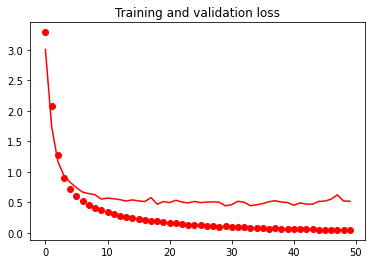

In [33]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

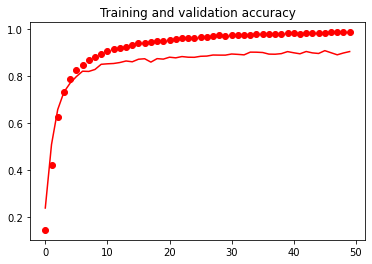

In [34]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation accuracy')
plt.title('Training and validation accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


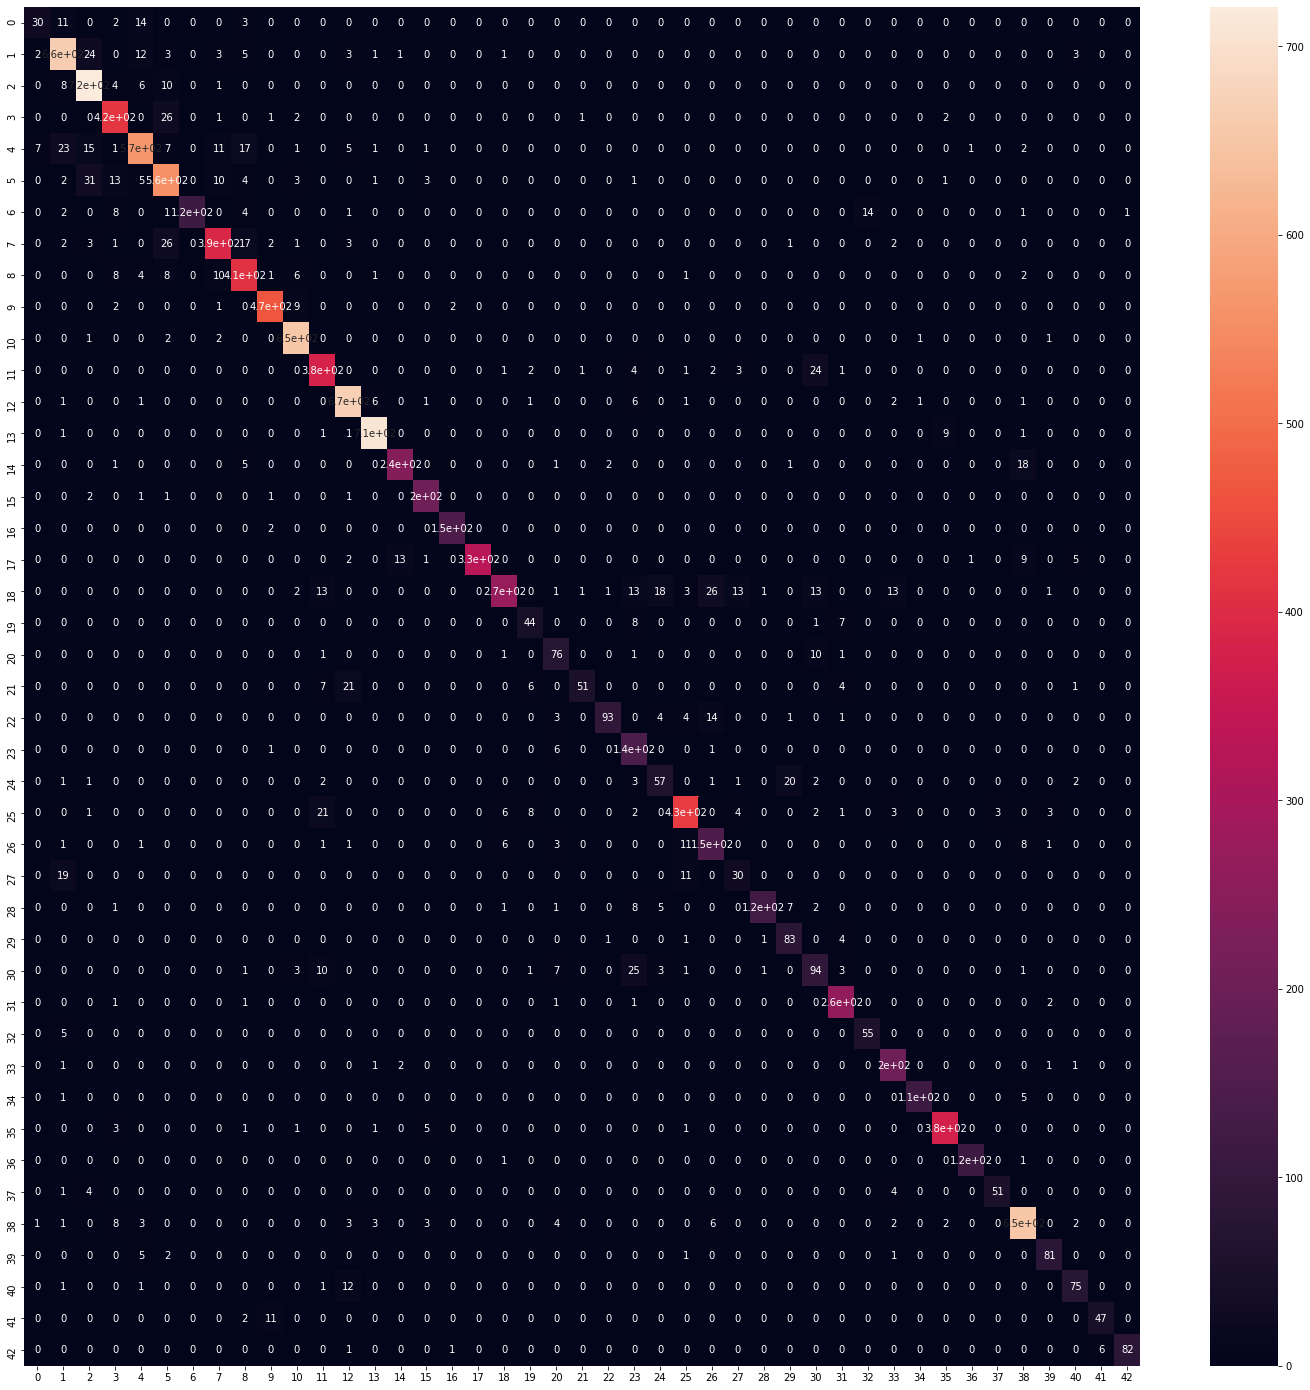

In [35]:
predicted_classes = model.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

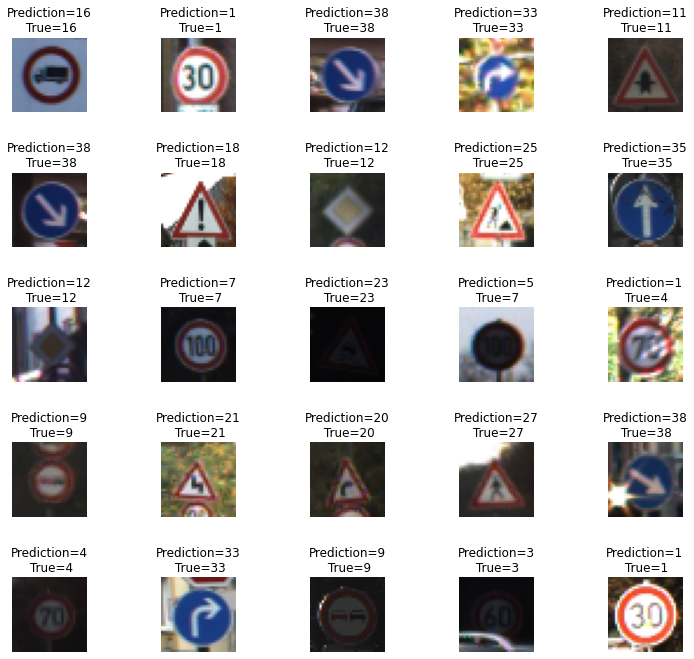

In [36]:
L=5
W=5
fig , axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction={}\n True={}'.format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)